# **Sauti East Africa - Customer Segmentation Analysis**

## **Problem Description**

Sauti East Africa, a non-profit social enterprise, focuses on improving the livelihoods of traders and farmers, and particularly women, in East Africa. They provide them with realtime market data through access to online digital resources. Sauti collect demographic data on these traders  solutions, but never had a way to visualize the demographic data for researchers.

Sauti has requested the Miller Center team to perform limited aggregate analysis of all of our user's behavior - on a project evaluation basis. Better understanding our user's interactions will allow Sauti to better optimize their menu design and explore the feasibility of `smart menus` based on user predicted behavior.

## **Databank**
Sauti provides access to their information platforms, mainly their customer base in Kenya, Uganda, Rwanda, and Tanzania. They are connected to a cellular network and can dial a short code (e.g., *716#) to interact with numbered menus and navigate to the relevant information provided by Sauti. This information is presented in multiple languages and the platforms are refreshed on an hourly basis with the most up-to-date information.

- Market prices
- Sauti virtual marketplace
- Currency exchange rates
- Weather forecasts
- Trade and tax info
- Finance management and services
- Agriculture info and services
- Business operations info
- Legal and anti-corruption info
- COVID-19 info
- Health info
- Corruption reporting

By improving access to up-to-date and relevant information for micro, small, and medium enterprises (MSMEs), Sauti is addressing the information gaps that prevent:  

- equal access to economic opportunities for women led MSMEs.
- regulatory compliance with official trade procedures.
- transparency and accountability for officials’ corrupt, or harassing, behavior; and,
- efficient local marketing and market timing for poorer MSMEs.

## **Purpose**
Sauti strives to bridge the digital divide by ensuring that our technology-
based solutions are accessible to users, including those with limited digital literacy, smartphones, or internet access. This includes USSD and SMS solutions so that anyone, anywhere, with any kind of phone may access the same online resources normally available to smartphone apps and internet-enabled computers.

**Objectives**
1. Describe and understand the past and current behavior of our users’ key demographics (e.g. gender, age, occupation)
  - Also understand the key social determinants (and/or demographic subgroups) of user behavior

2. Develop a proof-of-concept prediction algorithm that ranks the relevance of information types to an individual user based on a user’s previous interactions and user profile (e.g., Given a user’s previous interactions and user profile, when they next access)

  Sauti’s information platforms, they have:
  - 67% chance of viewing Market Price Information
  - 22% chance of viewing Tax Calculator
  - 5% chance of viewing Weather Information
  - 3% chance of viewing Marketplace
  - <3% chance of viewing other screens

3. Based on your analysis, what recommendations would you have to Sauti to improve Sauti's users interactions with the platform? Moreover, please share your suggestions on an optimized data structure.

**Import Packages**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/My Github Repository/sauti-platform-databank')

**Upload Datasets**

In [8]:
# Read all five platform datasets in the sauti databank
databank = pd.read_csv('platform_databank.csv')
sessions = pd.read_csv('platform_sessions.csv')
replies = pd.read_csv('platform_replies.csv')
screen_dict = pd.read_csv('platform_screen_dict.csv')
requests = pd.read_csv('platform_requests.csv')

## **Exploratory Data Analysis (EDA)**

Given the richness and complexity of our dataset, which encompasses diverse aspects such as user demographics, transactional behavior, and interaction patterns with the Sauti platform, our EDA is structured to address several key dimensions:

1. **Demographic Analysis:** Understanding the basic demographic makeup of our user base, including age, gender, education, and occupation. This helps in identifying distinct segments within the population.

2. **Behavioral Patterns:** Examining how different users interact with the Sauti platform. This includes frequency of access, types of services used, and overall engagement patterns.

3. **Transactional Insights:** Delving into the transactional data to understand the economic behavior of users, such as the types of commodities they are interested in, market preferences, and crossing frequencies.

4. **Geographical Trends:** Analyzing geographical data to discern any regional patterns or preferences, which could be crucial for targeted interventions or marketing.

## **User Based Analysis**

The primary aim of this section is to gain a clear understanding of our individual users by examining the intricacies of their platform interactions, preferences, and behaviors.

Our user-based analysis focuses on exploring the interplay between session counts and key demographic variables over several years. These variables include:

1. Borders of the participant countries
2. Age groups of the users
3. Gender distribution
4. Users' education levels
5. Frequency of border crossings
6. Users' occupations
7. Types of produce handled by the users
8. Most commonly used languages among users

Through this analysis, we aim to derive meaningful insights about our user base.

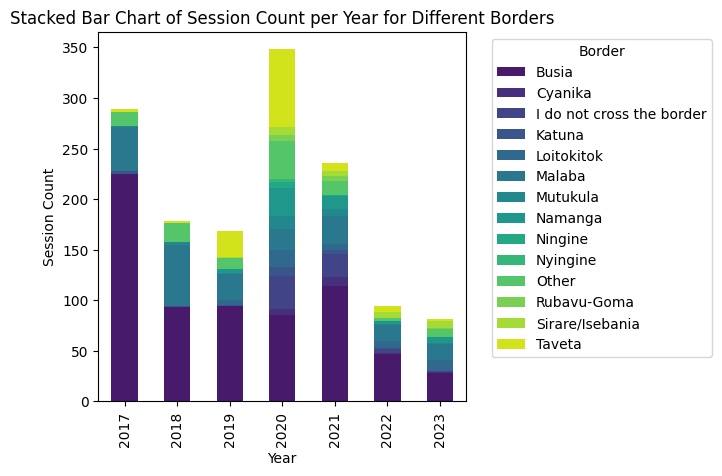

In [9]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'border'
filtered_databank = databank[(databank['key_name'] == 'border')]

# Create a bar chart to show login count per year for different borders
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Border', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

# Add a title to the chart
plt.title('Stacked Bar Chart of Session Count per Year for Different Borders')

plt.show()

The plot here represents the border of the participating countries by session counts per year from 2017 to 2023. We can clearly see that <i>Busia</i> is the most frequently appearing border over the years followed by <i>Malaba</i> and <i>Katuna</i>. We also see that 2020, 2021 saw a surge in the sessions where borders appeared compared to now in 2023. Also for some reason border appeared in a good amount of sessions for the year 2017, where mostly Busia was the majorly appearing border.

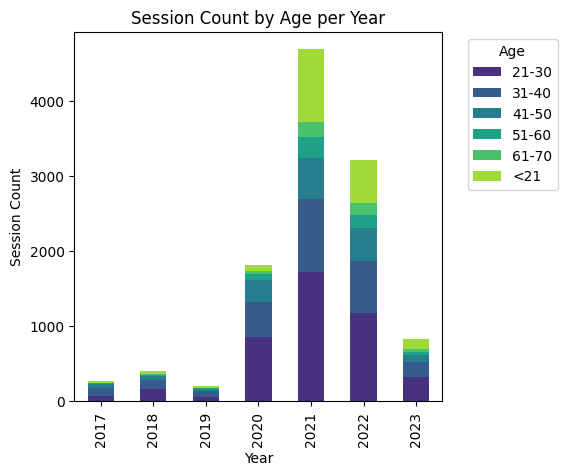

In [10]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'age'
filtered_databank = databank[(databank['key_name'] == 'age')]

# Create a bar chart to show login count per year for age
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Age per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Age', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the age of the participating users by session counts per year from 2017 to 2023. We can clearly see that <i>21-30 yrs</i> is the most frequently appearing age range over the years followed by <i>31-40 yrs</i> and <i> under 21 yrs</i>. We also see that 2021, 2022 and 2020 saw a surge in number of users from all the age groups compared to now in 2023. Also for some reason after 2020 there was a sudden spike in the number of users from all age groups till the year 2022 which can be associated to people having more time to dispense on the app being locked in their homes during Covid and post effects of Covid in 2022.

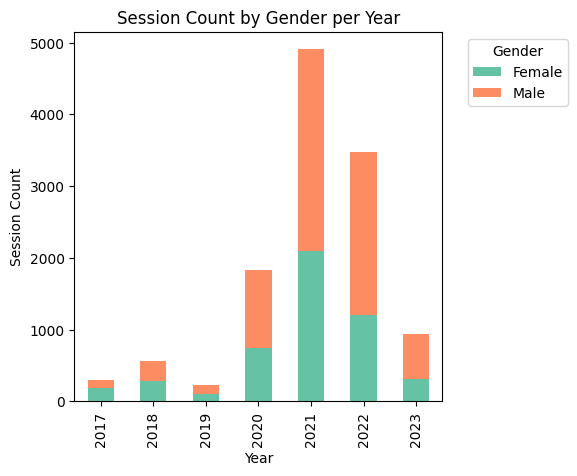

In [11]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'gender' and 'value_name' as 'male' or 'female'
filtered_databank = databank[(databank['key_name'] == 'gender')]

# Create a bar chart to show login count per year for male and female
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a consistent color palette for male and female
colors = sns.color_palette("Set2", n_colors=len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')

# Add a title to the chart
plt.title('Session Count by Gender per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the number of male and female users by session counts per year from 2017 to 2023. We can clearly see that <i>2021</i> accounted for the most number of users followed by <i>2022</i> and <i>2020</i>, which can again be associated with Covid. It can be clearly concluded from the plot that males use the app more than females in general, but 20117 and 2018 were the two years where females dominated the user group.

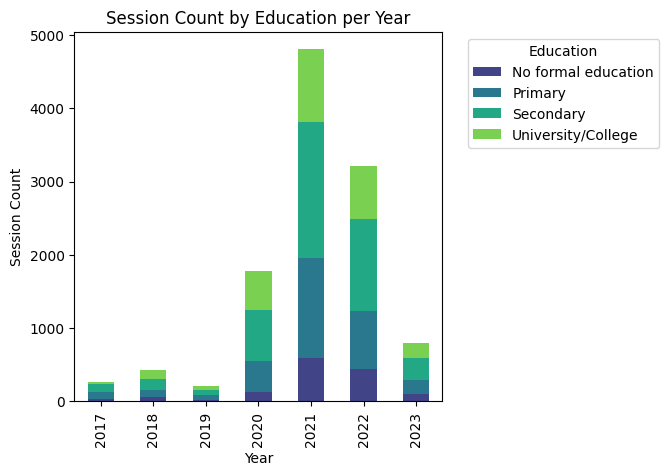

In [12]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'education'
filtered_databank = databank[(databank['key_name'] == 'education')]

# Create a bar chart to show login count per year for education
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Education per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Education', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the education leveel of the participating users by session counts per year from 2017 to 2023. We can clearly see that most users have received a <i>Secondary</i> education level followed by <i>Primary</i> and <i>University/College</i> level of education. We also see that 2021, 2022 and 2020 were the top three years where maximum number of users reported their eductaion level, which can again be associated with Covid and working remotely thereafter.

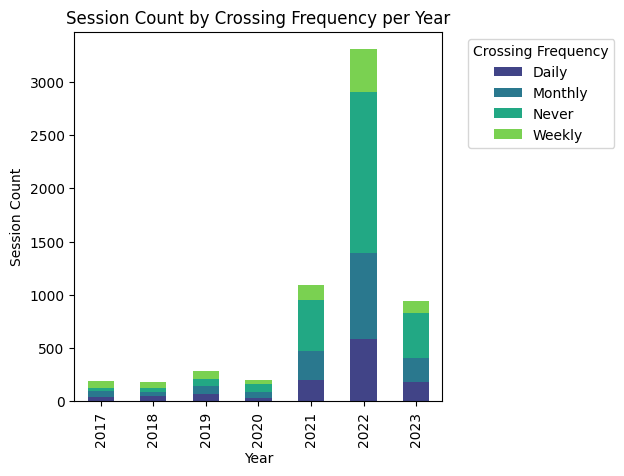

In [13]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'crossingfreq'
filtered_databank = databank[(databank['key_name'] == 'crossingfreq')]

# Create a bar chart to show login count per year for crossing frequency
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Crossing Frequency per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Crossing Frequency', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the Crossing Frequency of the participating users by session counts per year from 2017 to 2023. We can clearly see that maximum number of users reported <i>Never</i> crossing the border over the years followed by number of users who crossed  the border <i>Monthly</i> and <i>Daily</i>. We also see that 2022, was the year where maximum number of users were seen crossing the border monthly, which can be due to restrictions being removed after Covid.

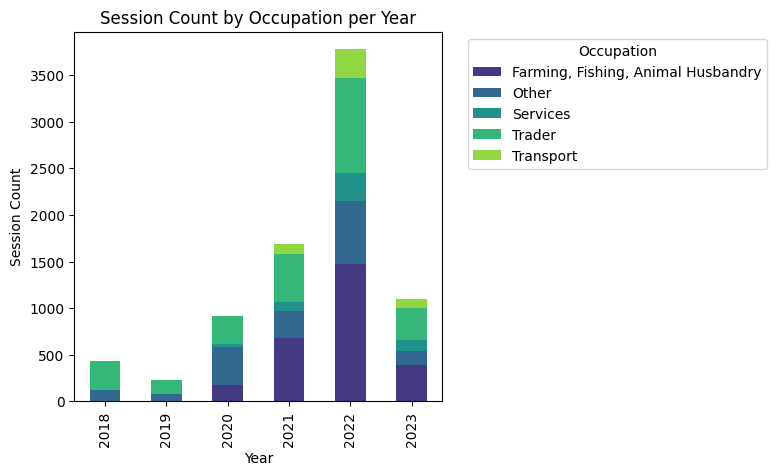

In [14]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'occupation'
filtered_databank = databank[(databank['key_name'] == 'occupation')]

# Create a bar chart to show login count per year for occupation
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Occupation per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Occupation', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the occupation of the participating users by session counts per year from 2017 to 2023. We can clearly see that most users are <i>Traders</i> followed by users who are into <i>Farming, Fishing and Animal Husbandry</i> and <i>other</i> occupations. We also see that 2022, saw a surge in the sessions whereusers reported their occupation compared to now in 2023. Before Covid users have been mostly traders and into other occupations.

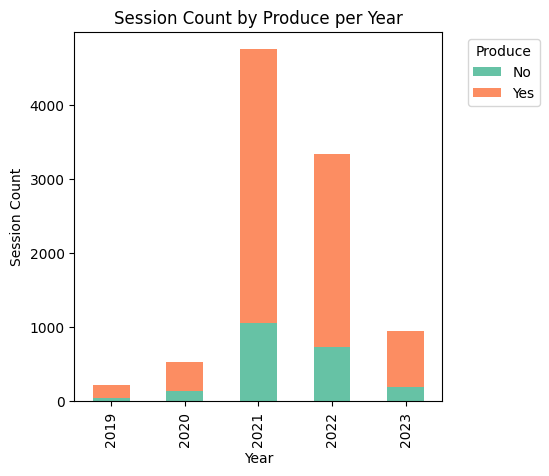

In [15]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'produce' and 'value_name' as 'Yes' or 'No'
filtered_databank = databank[(databank['key_name'] == 'produce')]

# Create a bar chart to show login count per year for produce
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a consistent color palette for male and female
colors = sns.color_palette("Set2", n_colors=len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')

# Add a title to the chart
plt.title('Session Count by Produce per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Produce', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the count for produce based on the session counts, whether there was a produce or not. We clearly see that  <i>2021</i> had the maximum amount of produce over the years followed by <i>2022</i> and <i>2023</i>. We also see that 2021, 2020 saw a surge in amount of produce compared overall, most probably due to users being able to dedicate more time at home to grow their produce. But this trend has been going downwards since then.

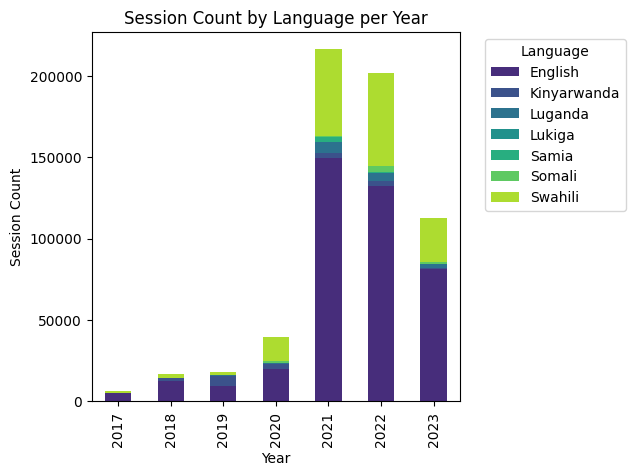

In [16]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'language'
filtered_databank = databank[(databank['key_name'] == 'language')]

# Create a bar chart to show login count per year for language
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Use a sequential color palette from Seaborn
colors = sns.color_palette("viridis", len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Language per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Language', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the most used language among participating users by session counts per year from 2017 to 2023. We can clearly see that <i>English</i> is the most used language over the years followed by <i>Swahili</i>. We also see that 2021, 2022 saw a surge in the sessions where most people reported their used language as English.

## **Sesssion Based Analysis**

The main objective of the session-based analysis is to closely examine and understand the patterns and details of user sessions on our platform. We aim to uncover how various factors affect user engagement across different timeframes.

In this analysis, we concentrate on the following key aspects:

1. Session counts associated with different procedure commodity categories in participating countries.
2. Users' interest in various commodity meta categories, as indicated by session counts.
3. Yearly session counts related to required procedural documents.
4. The distribution of male and female users in session counts, related to each procedure-relevant agency over time.

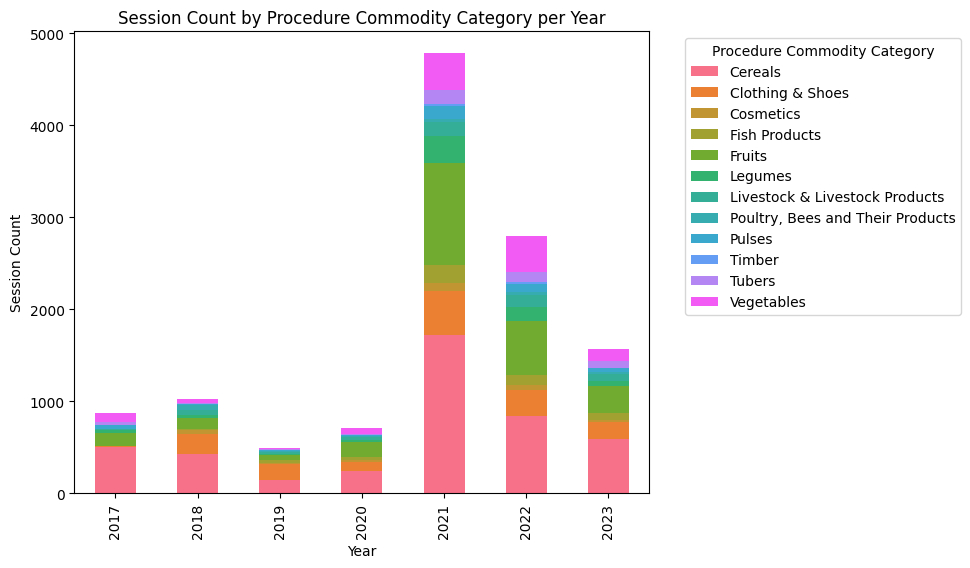

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for color palettes

# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'procedurecommoditycat'
filtered_databank = databank[(databank['key_name'] == 'procedurecommoditycat')]

# Create a colormap with unique colors for each 'procedurecommoditycat' value
unique_procedurecommoditycats = filtered_databank['value_name'].unique()
colors = sns.color_palette("husl", n_colors=len(unique_procedurecommoditycats))  # Use a sequential color palette

# Create a bar chart to show login count per year for Procedure Commodity Category with color-coding
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Procedure Commodity Category per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Procedure Commodity Category', loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust the figure size to make space for the legend
plt.subplots_adjust(right=0.7)

plt.show()


The plot here represents the Procedure Commodity Category of the participating countries by session counts per year from 2017 to 2023. We can clearly see that <i>Cereals</i> is the most frequently appearing procedure commodity category over the years followed by <i>Fruits</i> and <i>Clothing and Shoes</i>. We also see that 2021, 2022 saw a surge in the number of users being involved in trading these commodity categories. This trend seems to go downwards though. The surge can be associated to Covid, where most activities occured online.

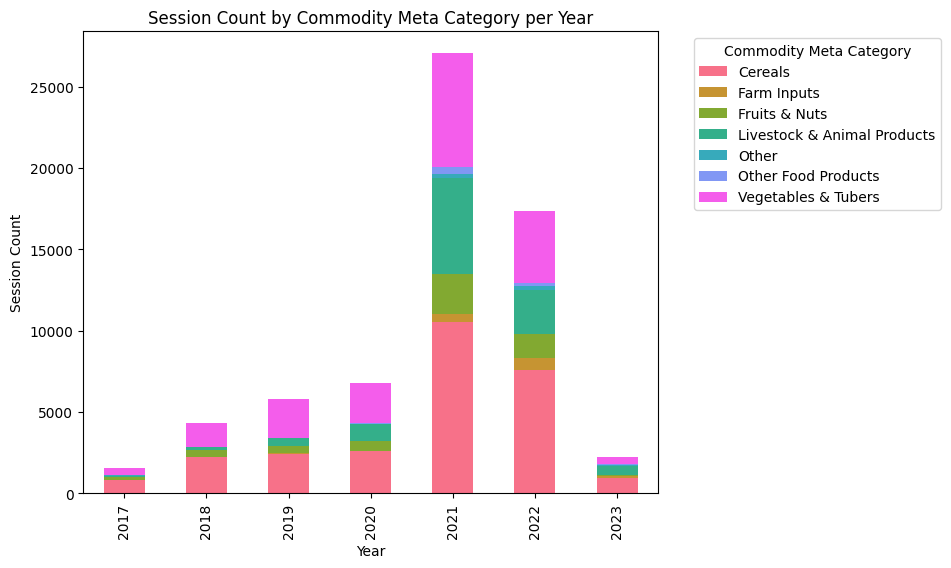

In [18]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'commoditymetacat'
filtered_databank = databank[(databank['key_name'] == 'commoditymetacat')]

# Create a bar chart to show login count per year for commodity meta category
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Create a colormap with unique colors for each 'procedurecommoditycat' value
unique_procedurecommoditycats = filtered_databank['value_name'].unique()
colors = sns.color_palette("husl", n_colors=len(unique_procedurecommoditycats))  # Use a sequential color palette

# Create a bar chart to show login count per year for Procedure Commodity Category with color-coding
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Commodity Meta Category per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Commodity Meta Category', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the Commodity meta categories users were interested in by session counts per year from 2017 to 2023. We can clearly see that <i>Cereals</i> is the most frequently appearing commodity meta category over the years followed by <i>Vegatable and Tubers</i> and <i>Livestock and Animal Products</i>. We also see that 2021, 2020 saw a surge in the sessions where these commodity meta categories appeared compared to now in 2023. This can be associated with Covid.

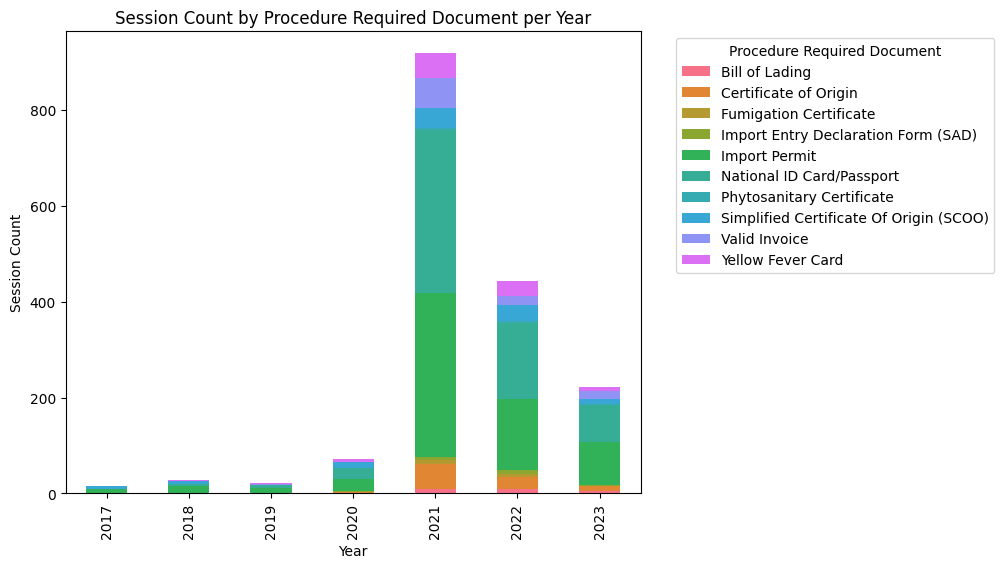

In [19]:
# Parse the 'created_date' column and extract the year
databank['created_date'] = pd.to_datetime(databank['created_date'])
databank['year'] = databank['created_date'].dt.year

# Filter rows with 'key_name' as 'procedurerequireddocument'
filtered_databank = databank[(databank['key_name'] == 'procedurerequireddocument')]

# Create a bar chart to show login count per year for procedure required document
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')

# Create a colormap with unique colors for each 'procedurecommoditycat' value
unique_procedurecommoditycats = filtered_databank['value_name'].unique()
colors = sns.color_palette("husl", n_colors=len(unique_procedurecommoditycats))  # Use a sequential color palette

# Create a bar chart to show login count per year for Procedure Commodity Category with color-coding
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Session Count')
plt.title('Session Count by Procedure Required Document per Year')

# Adjust the legend position using bbox_to_anchor
legend = plt.legend(title='Procedure Required Document', loc='upper left', bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.7)  # Adjust the figure size to make space for the legend

plt.show()

The plot here represents the Procedure Required Document by session counts per year from 2017 to 2023. We can clearly see that <i>Import Permit</i> has appeared most over the years followed by <i>National ID Card/ Passport</i> and <i>Certificate of Origin</i>. We also see that 2021, 2022 saw a surge in the sessions where these required documents were used compared to now in 2023. Also most number of required documents were seen to be used in 2021 probably due to Covid and Certificate of origin, Valid Invoice  have been seen to be used since recent times from 2021.

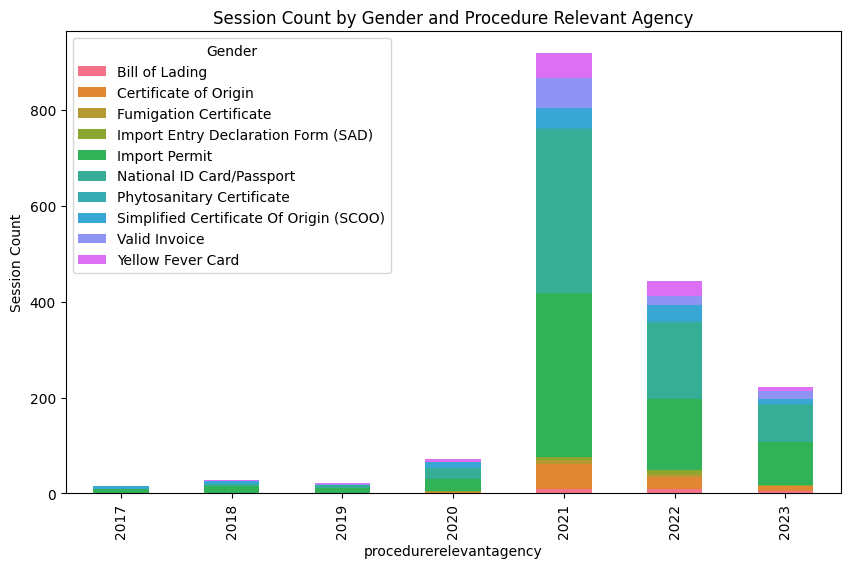

In [20]:
# Filter and reshape the data
procedurerelevantagency_df = databank[databank['key_name'] == 'procedurerelevantagency']
gender_df = databank[databank['key_name'] == 'gender']

merged_df = procedurerelevantagency_df.merge(gender_df, on='sess_id')

# Group and count by 'value_name' of procedurerelevantagency
grouped = merged_df.groupby('value_name_x')['value_name_y'].value_counts().unstack().fillna(0)

# Create a colormap with unique colors for each 'procedurecommoditycat' value
unique_procedurecommoditycats = filtered_databank['value_name'].unique()
colors = sns.color_palette("husl", n_colors=len(unique_procedurecommoditycats))  # Use a sequential color palette

# Create a bar chart to show login count per year for Procedure Commodity Category with color-coding
pivot_databank = filtered_databank.pivot_table(index='year', columns='value_name', values='sess_id', aggfunc='count')
ax = pivot_databank.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Customize the plot
plt.xlabel('procedurerelevantagency')
plt.ylabel('Session Count')
plt.title('Session Count by Gender and Procedure Relevant Agency')
plt.legend(title='Gender')
plt.show()

The plot here represents the number of male and female users by session counts corresponding to each of the Procedure Relevant Agency over the years. We can clearly see that <i>Clearing Agent</i> is the most frequently appearing agency over the years followed by <i>Kenya Bureau of Standards(KEBS)</i> and <i>COMESA Trade Information Desk Office(TIDO)</i>. We also see that mostly male users have used these agencies and few of the agencies like Port Health, Tanzania Revenue Authority(TRA), Uganda National Bureau of Standards(UNBS) and Uganda Revenue Authority(URA) have been rarely used and the all the users associated with these have been males.

## **Social Determinant Analysis**

The central purpose of the social determinant analysis is to explore and understand the social and economic factors that influence the behavior and preferences of users on our platform.



Let's join the two datasets - screen_dict and replies - as merged_responsedata on response_id column

In [21]:
# Joining screen_dict and replies datasets
merged_responsedata_raw = pd.merge(screen_dict, replies, on='response_id', how='outer')

# Use boolean indexing to filter rows where 'column_name' is not 'main screen' as this is just the initial screen for every platform
merged_responsedata = merged_responsedata_raw[merged_responsedata_raw['response_theme'] != 'Main Screen']

merged_responsedata.head()

,platform_id,response_id,response_theme,level,parent,reply_id,request_id,udate,sess_id
92725,1.0,22,Trade Info,1.0,1.0,2,4095,2017-06-06 14:19:29,1
92726,1.0,22,Trade Info,1.0,1.0,179,4285,2017-06-07 11:00:41,9
92727,1.0,22,Trade Info,1.0,1.0,211,4317,2017-06-07 11:11:02,9
92728,1.0,22,Trade Info,1.0,1.0,215,4321,2017-06-07 11:11:26,9
92729,1.0,22,Trade Info,1.0,1.0,349,4455,2017-06-07 12:07:54,7


<ipython-input-22-44dff596be2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_responsedata['udate'] = pd.to_datetime(merged_responsedata['udate'])
<ipython-input-22-44dff596be2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_responsedata['year'] = merged_responsedata['udate'].dt.year


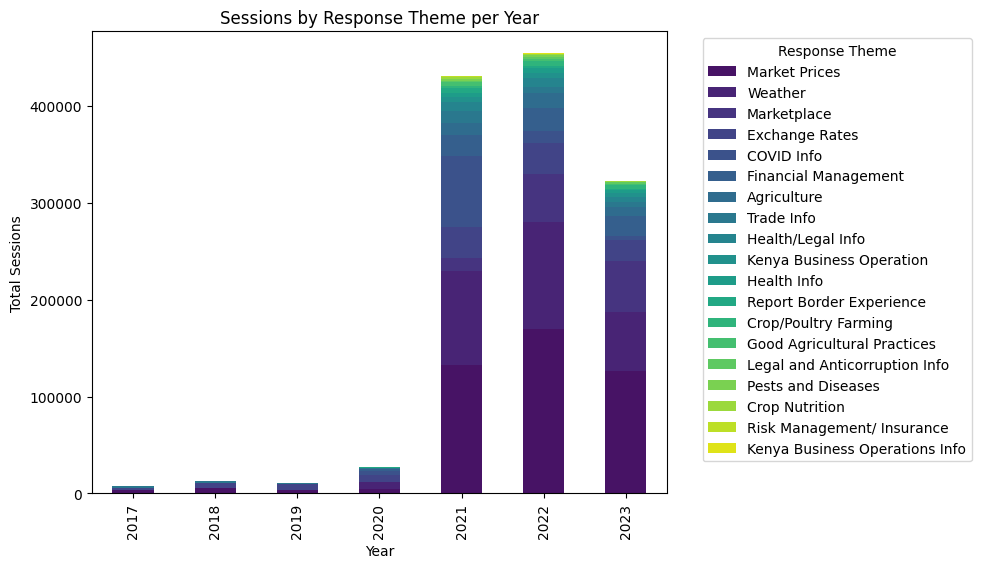

In [22]:
# Extracting the 'year' and filtering the data
merged_responsedata['udate'] = pd.to_datetime(merged_responsedata['udate'])
merged_responsedata['year'] = merged_responsedata['udate'].dt.year

# Group the data by 'year' and 'value_name' and count the sessions
grouped_responsedata = merged_responsedata.groupby(['year', 'response_theme'])['sess_id'].count().unstack()

# Sort the columns by the sum of each column (total count of sessions) in descending order
grouped_responsedata = grouped_responsedata[grouped_responsedata.sum().sort_values(ascending=False).index]

# Define a sequential color palette from Seaborn
colors = sns.color_palette("viridis", n_colors=len(grouped_responsedata.columns))

# Create a grouped bar chart with the sequential color palette
ax = grouped_responsedata.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

ax.set_xlabel('Year')
ax.set_ylabel('Total Sessions')
ax.set_title('Sessions by Response Theme per Year')

# Adjust the legend position using bbox_to_anchor
ax.legend(title='Response Theme', loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust the figure size to make space for the legend
plt.subplots_adjust(right=0.7)

plt.show()

The plot here represents the Response Theme per year by session counts from 2017 to 2023. We can clearly see that <i>Market Prices</i> is the most frequently appearing response theme over the years followed by <i>Weather</i> and <i>Marketplace</i> and <i>Exchange rates</i> in which users are interested. We also see that for years 2022, 2021 and 2023 there has been a surge in the session counts accounting for the search for these response themes.

## **Social Demographic Subgroups of User Behavior**

The Social Demographic Subgroups section aims to analyze and clarify the interactions of various social and demographic groups within our user base with the platform. The objective is to identify distinct behavioral trends and preferences among different user profiles.

This section concentrates on:

1. Session counts of male and female users across different age ranges.
2. Comparative session counts of male and female users within each Procedure Commodity Category.
3. Top 10 commodity products preferred by male and female users, analyzed by session count over time.
4. The proportion of male and female users within each age range, aligned with the Response Themes over the years.

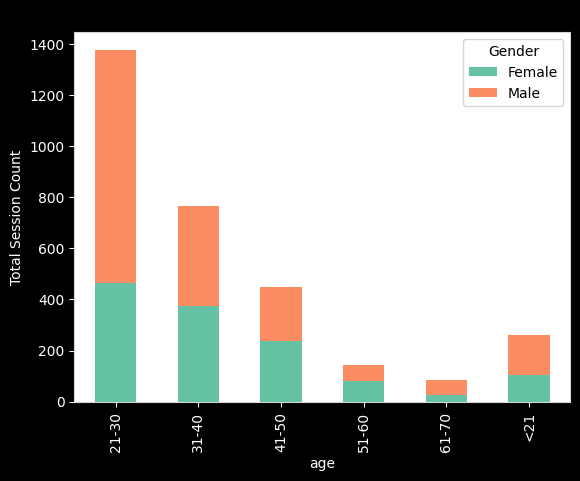

In [25]:
# Filter and reshape the data
age_df = databank[databank['key_name'] == 'age']
gender_df = databank[databank['key_name'] == 'gender']

merged_df = age_df.merge(gender_df, on='sess_id')

# Group and count by 'value_name' of age
grouped = merged_df.groupby('value_name_x')['value_name_y'].value_counts().unstack().fillna(0)

# Use a consistent color palette for male and female
colors = sns.color_palette("Set2", n_colors=len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = grouped.plot(kind='bar', stacked=True, color=colors)

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# Customize the plot
plt.xlabel('age')
plt.ylabel('Total Session Count')
plt.title('Total Session Count by Gender and Age')
plt.legend(title='Gender')
plt.show()

The plot here represents the male and female users by session count for each age range. We can clearly see that the age range of <i>21-30 yrs</i> has the most number of males and then females followed by male female users in the age range of <i>31-40 yrs</i> and <i>41-50 yrs</i>. Overall more users are men than women for any age range, which indicates men are mostly involved in occupations outside of home.

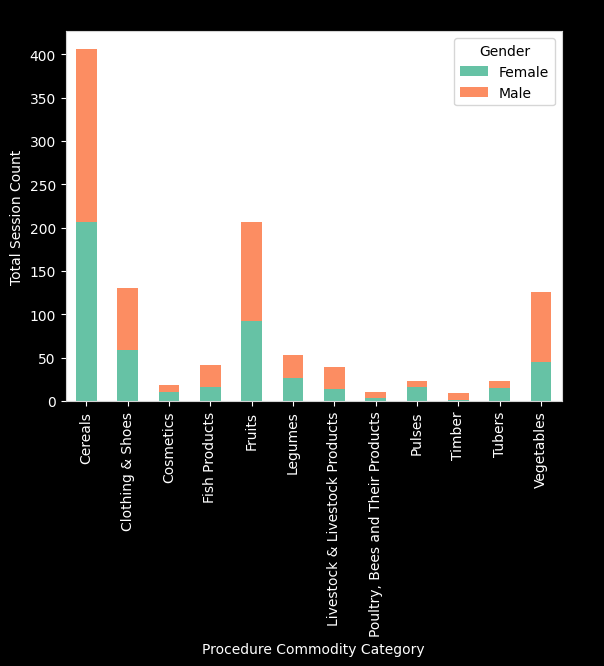

In [24]:
# Filter and reshape the data
procedurecommoditycat_df = databank[databank['key_name'] == 'procedurecommoditycat']
gender_df = databank[databank['key_name'] == 'gender']

merged_df = procedurecommoditycat_df.merge(gender_df, on='sess_id')

# Group and count by 'value_name' of procedure commodity category
grouped = merged_df.groupby('value_name_x')['value_name_y'].value_counts().unstack().fillna(0)

# Use a consistent color palette for male and female
colors = sns.color_palette("Set2", n_colors=len(pivot_databank.columns))

# Plot the stacked bar chart with colors
ax = grouped.plot(kind='bar', stacked=True, color=colors)

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# Customize the plot
plt.xlabel('Procedure Commodity Category')
plt.ylabel('Total Session Count')
plt.title('Total Session Count by Gender and Procedure Commodity Category')
plt.legend(title='Gender')
plt.show()

The plot here represents the male and female users by session count for each Procedure Commodity Category. The user behavior that stands out here is that significantly more <i>women</i> are interested in <i> Pulses</i> and <i> Tubers</i> and only <i>men</i> are interested in <i> Timber</i>.

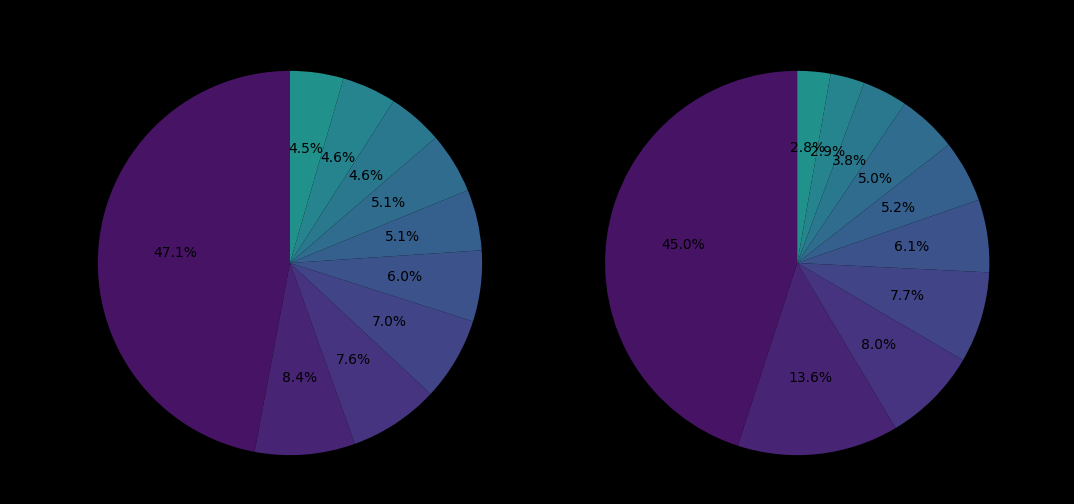

In [22]:
# Filter and reshape the data
commodityproduct_df = databank[databank['key_name'] == 'commodityproduct']
gender_df = databank[databank['key_name'] == 'gender']

merged_df = commodityproduct_df.merge(gender_df, on='sess_id')

# Group and count by 'value_name' of procedure commodity category
grouped = merged_df.groupby('value_name_x')['value_name_y'].value_counts().unstack().fillna(0)

# Sort and select the top 10 commodity products for male and female
top_male = grouped['Male'].nlargest(10)
top_female = grouped['Female'].nlargest(10)

# Define a sequential color palette from Seaborn
colors = sns.color_palette("viridis", n_colors=len(grouped_responsedata.columns))

# Create two separate pie charts for male and female with the custom colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for male
ax1.pie(top_male, labels=top_male.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Top 10 Commodity Products for Male')

# Pie chart for female
ax2.pie(top_female, labels=top_female.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')
ax2.set_title('Top 10 Commodity Products for Female')

plt.style.use('dark_background')
plt.show()


The two pie charts here represent the male and female users choosen top 10 commodity products by session count over the years. The user behavior that stands out here is that significantly more <i>women</i> are interested in <i> Rosecoco Beans</i>, only men are interested in <i>Goat</i> and <i> Soya Beans</i> and only women are interested in <i> Black Beans</i> and <i> Can Fertilizer</i>.

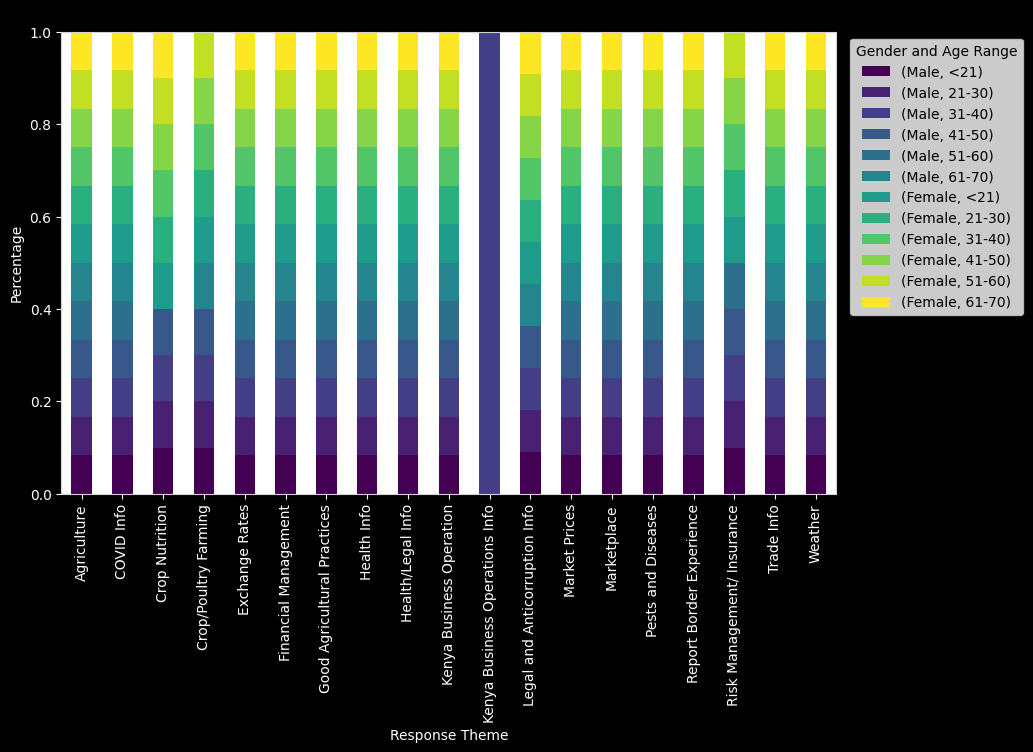

In [27]:
from cycler import cycler

df = databank[databank['key_name'].isin(['gender', 'age'])]
df= df.pivot_table(index='sess_id', columns='key_name', values='value_name', aggfunc='first')

# merged_responsedata = pd.merge(screen_dict, replies, on='response_id', how='outer')
df = pd.merge(merged_responsedata, df, on='sess_id', how='outer')

df = df.dropna(subset=['age', 'gender', 'response_theme'], how='any')

df = df[['age', 'gender', 'response_theme']]

df = df.drop_duplicates(subset=['age', 'gender', 'response_theme'])

# # Define the age groups you want to consider
age_groups = ["<21", "21-30", "31-40", "41-50", "51-60", "61-70"]

# # Create a new DataFrame with age groups and gender as columns
age_gender_df = pd.crosstab(df['response_theme'], [df['gender'], df['age']], normalize='index').reindex(columns=[('Male', age) for age in age_groups] + [('Female', age) for age in age_groups])

# Plot the data
ax = age_gender_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Set labels and title
plt.xlabel("Response Theme")
plt.ylabel("Percentage")
plt.title("Gender and Age Range Distribution by Response Theme")

# Show the legend outside of the plot using bbox_to_anchor
ax.legend(title="Gender and Age Range", loc="upper right", bbox_to_anchor=(1.25, 1))

# Remove any age groups with 0% in the chart
plt.ylim(0, 1)

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# Show the chart
plt.show()

The plot here represents the number of male and female users and their age range by percentage for each of the Response Themes over the years. We can clearly see that <i>Kenya Business Operations Info</i> has only male users associated with it in the age range of 31-40 years. Older women in the age range of <i>61-70 yrs</i> are not interested in particularly <i> Crop/ Poultry Farming</i> and <i>Risk Management/ Insurance</i>. More females and younger women are interested in <i>Crop Nutrition</i> and <i>Legal and Anticorruption Info</i>.

# **Probablility Distribution Random Classifier Model**

**Predict Commodity Meta Categories for Males and Females** <br>

**Step 1.** Split date into year and months columns , show how useage and demographics have changed over time <br>

**Step 2.** Split databank into users database and sessions database, use this for demographic info<br>

**Step 3.** Merge sessions based questions with requests, replies and user database to get info on how usage has changed over time, can run regressions on this to predict useage <br>
<br>
*use country code to get country for platforms users with that country code use

In [ ]:
# Filter relevant rows and pivot the data
databank = databank[databank['key_name'].isin(['gender', 'age', 'commoditymetacat'])]

# Remove duplicate entries based on 'sess_id'
databank = databank.drop_duplicates(subset=['sess_id', 'key_name'], keep='first')

In [ ]:
# databank = databank.pivot_table(index='sess_id', columns='key_name', values='value_name', aggfunc='first')
databank = databank.pivot(index='sess_id', columns='key_name', values='value_name')
databank.reset_index(inplace=True)

# Drop `sess_id` from databank and remove NaN missing values
databank = databank.drop('sess_id', axis=1)
databank = databank[pd.notna(databank['gender'])]
databank = databank[pd.notna(databank['age'])]
databank = databank[pd.notna(databank['commoditymetacat'])]

# Get dummy variables for the binary variables `gender` and `age`
databank = pd.get_dummies(databank, columns=['gender', 'age'], prefix=['gender', 'age'])

In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop target variable `commoditymetacat` from X
X = databank.drop('commoditymetacat', axis=1)
y = databank['commoditymetacat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest classifier (you can choose other classifiers)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

In [26]:
# Predict Probability Distribution
# Input age range and gender for prediction
input_data = X_train.columns.to_list()  # Use the same columns that were used for training
print('Training columns:' + str(input_data))

input_data = pd.DataFrame({
   'gender_Female': [1],
   'gender_Male': [0],
   'age_21-30': [1],
   'age_31-40': [0],
   'age_41-50': [0],
   'age_51-60': [0],
   'age_61-70': [0],
   'age_<21':   [0],
})

# Predict probability distribution of commoditymetacat
probs = model.predict_proba(input_data)

# Get the class labels (commoditymetacat names)
class_labels = model.classes_

# Print the names and probabilities
for label, prob in zip(class_labels, probs[0]):
   print(f"Commodity: {label}, Probability: {prob:.2f}")


Training columns:['gender_Female', 'gender_Male', 'age_21-30', 'age_31-40', 'age_41-50', 'age_51-60', 'age_61-70', 'age_<21']
Commodity: Cereals, Probability: 0.41
Commodity: Farm Inputs, Probability: 0.01
Commodity: Fruits & Nuts, Probability: 0.16
Commodity: Livestock & Animal Products, Probability: 0.20
Commodity: Other, Probability: 0.00
Commodity: Other Food Products, Probability: 0.01
Commodity: Vegetables & Tubers, Probability: 0.21


Using Random Forest Classifier, here we have predicted the various Commodity Meta Categories for Males and Females, based on their age range. It gives different values based on the selected input. We have choosen a broader category of Commodity category so as to have better prediction scores, as there were too many commodity products which would not give a good prediction value.

## **Data Cleaning**

In this Data Cleaning section, we focus on streamlining and optimizing our dataset for effective analysis. This is crucial for ensuring the accuracy and relevance of our insights, especially regarding user behavior and demographics.

The main steps in this section are:
1. **Session-Based Segmentation:** Organizing data around sess_id to track and analyze customer interactions per session.

2. **Link Demographic to Sessions:** Associating cell_num_id with demographic details to build comprehensive profiles for each transaction or customer session.




In [27]:
databank = pd.read_csv('platform_databank.csv')

In [28]:
databank.head(10)

,cell_num_id,sess_id,key_name,value_name,created_date
0,254000000003,50.0,procedurecommoditycat,Cereals,2017-06-20 00:47:17.000000
1,254000000003,50.0,procedurecommodity,Maize,2017-06-20 00:47:17.000000
2,254000000003,50.0,proceduredest,UGA->KEN,2017-06-20 00:47:17.000000
3,254000000003,50.0,procedureorigin,EAC,2017-06-20 00:47:17.000000
4,254000000012,52.0,procedurecommoditycat,Cereals,2017-06-20 00:47:33.000000
5,254000000012,52.0,procedurecommodity,Maize,2017-06-20 00:47:33.000000
6,254000000010,54.0,procedurecommoditycat,Cereals,2017-06-20 00:47:44.000000
7,254000000010,54.0,procedurecommodity,Maize,2017-06-20 00:47:44.000000
8,254000000007,59.0,procedurecommoditycat,Cereals,2017-06-20 00:48:16.000000
9,254000000007,59.0,procedurecommodity,Maize,2017-06-20 00:48:16.000000


In [29]:
databank['Country_code']=databank['cell_num_id'].astype(str).str[:3]
databank['Country_code'].astype('int')

0          254
1          254
2          254
3          254
4          254
          ... 
1150582    250
1150583    250
1150584    250
1150585    250
1150586    250
Name: Country_code, Length: 1150587, dtype: int64

In [30]:
# Convert all key names to lowercase to standardize
databank['key_name'] = databank['key_name'].str.lower()

In [31]:
databank.head()

,cell_num_id,sess_id,key_name,value_name,created_date,Country_code
0,254000000003,50.0,procedurecommoditycat,Cereals,2017-06-20 00:47:17.000000,254
1,254000000003,50.0,procedurecommodity,Maize,2017-06-20 00:47:17.000000,254
2,254000000003,50.0,proceduredest,UGA->KEN,2017-06-20 00:47:17.000000,254
3,254000000003,50.0,procedureorigin,EAC,2017-06-20 00:47:17.000000,254
4,254000000012,52.0,procedurecommoditycat,Cereals,2017-06-20 00:47:33.000000,254


## **Demographic Clustering: Customer Segemntation Analysis**

Preprocess the data with an LLM, run the embeddings through K-means, finally use Light GBM to explain each cluster


**Import Packages**

In [62]:
# data visualization
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

**Preprocessing Data**

1. **Split Key/Value Pairs:** Pivot tables suggests that the data may need to be organized in a tabular format. The process involves splitting key-value pairs.

2. **Convert Text to Embedded:** Reference to the process of representing text data as numerical vectors.





In [34]:
clustering_keys = ['age','Country_code','border','occupation','gender','education','crossingfreq','produce','commodityproduct','commoditymarket','language','proceduredest']

In [35]:
clustering_df = databank.pivot_table(index=['sess_id', 'cell_num_id'], columns='key_name', values='value_name', aggfunc='first')

In [36]:
clustering_df

,key_name,age,border,commoditymarket,commoditymetacat,commoditymetacountry,commodityproduct,crossingfreq,education,exchangedirection,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
sess_id,cell_num_id,,,,,,,,,,,,,,,,,,,
50.0,254000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
52.0,254000000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
54.0,254000000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
59.0,254000000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
61.0,254000000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466917.0,254000069990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466919.0,254000118582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swahili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466920.0,254000117507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
clustering_df = clustering_df.reset_index()

In [38]:
clustering_df

key_name,sess_id,cell_num_id,age,border,commoditymarket,commoditymetacat,commoditymetacountry,commodityproduct,crossingfreq,education,...,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
0,50.0,254000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
1,52.0,254000000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
2,54.0,254000000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
3,59.0,254000000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
4,61.0,254000000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369373,466917.0,254000069990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369374,466919.0,254000118582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Swahili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369375,466920.0,254000117507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369376,466921.0,254000119192,NaN,NaN,Kapkwen,NaN,NaN,Rosecoco Beans,NaN,NaN,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
clustering_df['Country_code']=clustering_df['cell_num_id'].astype(str).str[:3]
clustering_df['Country_code'].astype('int')

0         254
1         254
2         254
3         254
4         254
         ... 
369373    254
369374    254
369375    254
369376    254
369377    254
Name: Country_code, Length: 369378, dtype: int64

In [40]:
clustering_df=clustering_df[clustering_keys]

In [41]:
clustering_df.head()

key_name,age,Country_code,border,occupation,gender,education,crossingfreq,produce,commodityproduct,commoditymarket,language,proceduredest
0,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGA->KEN
1,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGA->KEN
4,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
!pip install transformers

In [43]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=c3aacd5225a6fc0c8d5d0cdf0b525e4c629549a2c927a4906b2792013cf57b32
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
def make_text(x):

    text =  f"""age: {x['age']},
                border: {x['border']},
                occupation: {x['occupation']},
                gender: {x['gender']},
                education: {x['education']},
                crossingfreq: {x['crossingfreq']},
                produce: {x['produce']},
                commodityproduct: {x['commodityproduct']},
                commoditymarket: {x['commoditymarket']},
                language: {x['language']},
                proceduredest: {x['proceduredest']},
                Country_code: {x['Country_code']}
            """

    return text

text = clustering_df.apply(lambda x: make_text(x), axis=1).tolist()

In [ ]:
model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
output = model.encode(sentences=text,
         show_progress_bar=True,
         normalize_embeddings=True)

df_embedding = pd.DataFrame(output)
df_embedding

Batches:   0%|          | 0/11544 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.054630,0.031877,0.000613,-0.029122,-0.063190,-0.032790,0.026601,-0.007920,-0.022709,0.062642,...,0.053489,-0.065470,-0.002234,-0.042182,-0.034440,0.010583,0.050081,-0.008227,-0.015102,-0.010502
1,0.058280,0.028668,-0.002655,-0.034798,-0.054955,-0.033341,0.029350,-0.001681,-0.028377,0.065665,...,0.058561,-0.070146,-0.003766,-0.024526,-0.030072,0.010910,0.039144,-0.003534,-0.006981,-0.010102
2,0.058280,0.028668,-0.002655,-0.034798,-0.054955,-0.033341,0.029350,-0.001681,-0.028377,0.065665,...,0.058561,-0.070146,-0.003766,-0.024526,-0.030072,0.010910,0.039144,-0.003534,-0.006981,-0.010102
3,0.054630,0.031877,0.000613,-0.029122,-0.063190,-0.032790,0.026601,-0.007920,-0.022709,0.062642,...,0.053489,-0.065470,-0.002234,-0.042182,-0.034440,0.010583,0.050081,-0.008227,-0.015102,-0.010502
4,0.058280,0.028668,-0.002655,-0.034798,-0.054955,-0.033341,0.029350,-0.001681,-0.028377,0.065665,...,0.058561,-0.070146,-0.003766,-0.024526,-0.030072,0.010910,0.039144,-0.003534,-0.006981,-0.010102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369373,0.055428,0.027773,-0.003660,-0.037542,-0.053768,-0.035492,0.028892,-0.002333,-0.030077,0.068247,...,0.059260,-0.071159,-0.004889,-0.027548,-0.030264,0.012900,0.040368,-0.007033,-0.004247,-0.007722
369374,0.047667,0.031672,-0.014526,-0.036547,-0.054998,-0.031646,0.025585,-0.007926,-0.028124,0.069367,...,0.053428,-0.071963,0.002693,-0.037297,-0.031287,0.024995,0.046671,-0.007309,-0.011964,-0.013848
369375,0.055428,0.027773,-0.003660,-0.037542,-0.053768,-0.035492,0.028892,-0.002333,-0.030077,0.068247,...,0.059260,-0.071159,-0.004889,-0.027548,-0.030264,0.012900,0.040368,-0.007033,-0.004247,-0.007722
369376,0.007176,0.044907,-0.027020,-0.029548,-0.058843,-0.042840,0.021809,-0.002338,-0.019830,0.071603,...,0.064967,-0.064455,0.020173,-0.035466,-0.035795,0.009136,0.051854,-0.035574,-0.019777,-0.015093


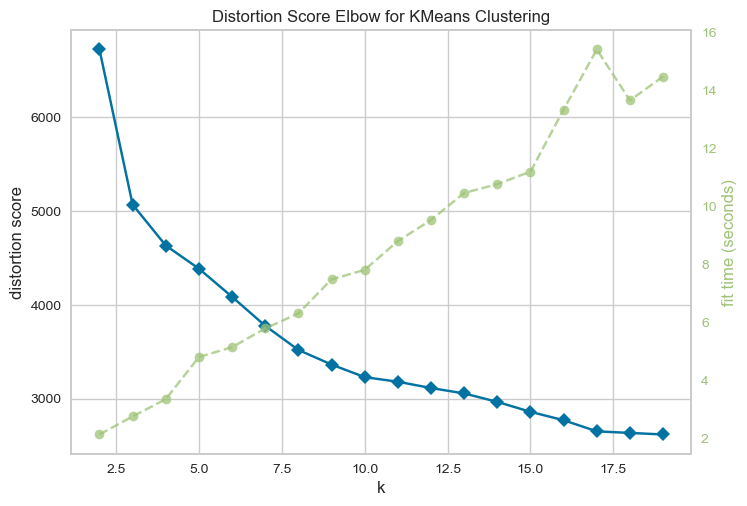

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,20), locate_elbow=False)

visualizer.fit(df_embedding)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
# Define the number of clusters based on the elbow method
n_clusters=8

In [ ]:
# Define KMeans clustering model
km = KMeans(n_clusters=n_clusters,init = "k-means++", random_state=0)
clusters=km.fit(df_embedding)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
print(km.predict(df_embedding).shape)
#plt.scatter(#,#,c=km.labels_)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


(8, 384)
(369378,)
(369378,)


In [ ]:
# Assess the "compactness" or "internal cohesion" of the clusters.
print(clusters.inertia_)
clusters_predict = clusters.predict(df_embedding)

3518.68798828125


In [ ]:
km.cluster_centers_

array([[ 0.05733177,  0.02198291, -0.0083372 , ..., -0.00353861,
         0.00418285, -0.00240904],
       [ 0.04758067,  0.03212655, -0.01513157, ..., -0.00779452,
        -0.01222903, -0.01402331],
       [ 0.03240557,  0.05361288, -0.01548127, ..., -0.01410815,
        -0.02454427, -0.025745  ],
       ...,
       [ 0.05449176,  0.02853776, -0.00491082, ..., -0.00755926,
        -0.00514555, -0.00896689],
       [ 0.04113937,  0.0814422 , -0.00072841, ..., -0.01369342,
        -0.00960801, -0.01475184],
       [ 0.03945642,  0.03965294, -0.00179648, ..., -0.02561218,
        -0.02885939, -0.02419759]], dtype=float32)

In [ ]:
print(f"Silhouette Score: {silhouette_score(df_embedding,clusters_predict)}")

Silhouette Score: 0.5870156288146973


In [ ]:
print("Cluster memberships:\n{}".format(km.labels_))

Cluster memberships:
[5 5 5 ... 5 4 5]


In [ ]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import shap

lgb_km = lgb.LGBMClassifier()

for col in ['age','Country_code', 'border', 'occupation', 'gender', 'education', 'crossingfreq', 'produce', 'commodityproduct', 'commoditymarket', 'language', 'proceduredest']:
    clustering_df[col] = clustering_df[col].astype('category')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
clustering_df

key_name,age,Country_code,border,occupation,gender,education,crossingfreq,produce,commodityproduct,commoditymarket,language,proceduredest
0,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGA->KEN
1,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGA->KEN
4,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
369373,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
369374,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swahili,NaN
369375,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
369376,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,Rosecoco Beans,Kapkwen,English,NaN


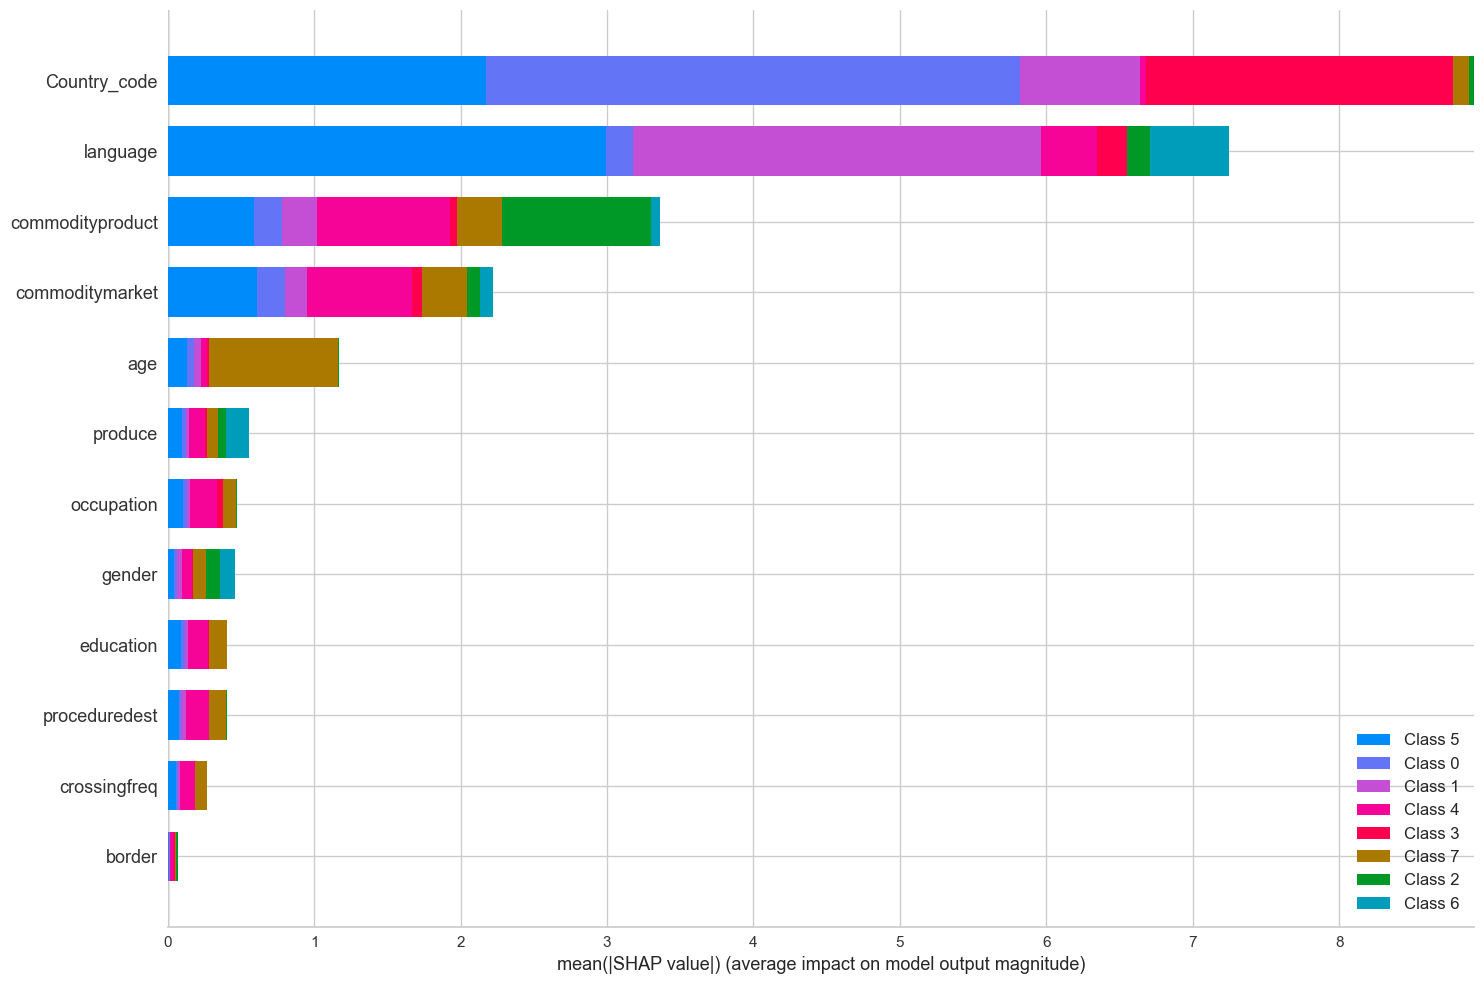

In [ ]:
# Fit clustering model with the Light Gradiant Boost Machine (GBM)
lgb_km.fit(X=clustering_df, y=clusters_predict)

# SHAP values
explainer_km = shap.TreeExplainer(lgb_km)  # Fit the explainer to the trained classifier
shap_values_km = explainer_km.shap_values(clustering_df)
shap.summary_plot(shap_values_km, clustering_df, plot_type="bar", plot_size=(15, 10))

In [ ]:
y_pred = lgb_km.predict(clustering_df)
accuracy=accuracy_score(y_pred, clusters_predict)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy))
print(classification_report(clusters_predict, y_pred))

Training-set accuracy score: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57924
           1       1.00      1.00      1.00     52031
           2       1.00      1.00      1.00     14742
           3       1.00      1.00      1.00     30023
           4       1.00      0.99      0.99     34595
           5       1.00      1.00      1.00    166261
           6       1.00      1.00      1.00      3472
           7       1.00      1.00      1.00     10330

    accuracy                           1.00    369378
   macro avg       1.00      1.00      1.00    369378
weighted avg       1.00      1.00      1.00    369378



The accuracy score on the training model indicates that it correctly classified approximately 99.85% of the training data. While a high training accuracy is desirable, it's important to also evaluate the model on a separate test dataset to assess its generalization performance.

- The `precision`, `recall`, and `f1-score` suggests that our model  performs exceptionally well for each class on the training data. It correctly identifies instances of each class with high precision and recall, resulting in high F1-scores.
- The `support` column shows the number of instances for each class in the dataset. It provides information about the class distribution. For example, class 0 has 57,924 instances, class 1 has 52,031 instances, and so on.
- Both macro and weighted averages of `precision`, `recall`, and `F1-score` are reported as 1.00. This suggests that the **model's performance is consistent across all classes, and the weighted average takes into account class imbalances**.

While high training performance is promising, further evaluation on a separate test dataset is necessary to determine how well the model generalizes to new, unseen data.

In [ ]:
clustering_df["cluster"] = clusters_predict

df_group = clustering_df.groupby('cluster').agg(
    {
        'age': lambda x: x.value_counts().index[0],
        'border': lambda x: x.value_counts().index[0],
        'occupation': lambda x: x.value_counts().index[0],
        'gender': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'crossingfreq': lambda x: x.value_counts().index[0],
        'produce': lambda x: x.value_counts().index[0],
        'commodityproduct': lambda x: x.value_counts().index[0],
        'commoditymarket': lambda x: x.value_counts().index[0],
        'language': lambda x: x.value_counts().index[0],
        'proceduredest': lambda x: x.value_counts().index[0],

    }
).sort_values("age").reset_index()
df_group


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


key_name,cluster,age,border,occupation,gender,education,crossingfreq,produce,commodityproduct,commoditymarket,language,proceduredest
0,6,21-30,Busia,Trader,Male,Primary,Daily,No,Beef,Nairobi,Somali,KEN->TZA
1,7,21-30,Busia,"Farming, Fishing, Animal Husbandry",Male,Secondary,Never,Yes,Dry Maize,Busia,English,UGA->KEN
2,0,<21,Busia,Trader,Male,Secondary,Never,Yes,Rice,Lira,English,UGA->KEN
3,1,<21,Busia,Other,Female,Primary,Never,Yes,Rice,Kampala,Swahili,UGA->KEN
4,2,<21,Busia,Trader,Male,Secondary,Never,Yes,Dry Maize,Busia,English,UGA->KEN
5,3,<21,I do not cross the border,Other,Male,Primary,Never,Yes,Rice,Mbeya,Swahili,KEN->TZA
6,4,<21,Busia,"Farming, Fishing, Animal Husbandry",Male,Secondary,Never,Yes,Rosecoco Beans,Busia,English,UGA->KEN
7,5,<21,Busia,Trader,Male,Secondary,Never,Yes,Beef,Busia,English,UGA->KEN


## **Enhancing Customer Segmentation: Demographic and Session Data**

Let's predict the response_theme based on the input features from the cleaned demographic and session dataframe. This should help us train our model with new, unseen user demographic data.


Let's merge the interaction data of `requests` and `replies` while cleaning for columns when necessary

In [29]:
# Step 1: Merge the interaction data
interaction_data = pd.merge(requests, replies, on='request_id')
# Drop the unwanted columns
interaction_data.drop(['udate_y', 'sess_id_y'], axis=1, inplace=True)
# Rename the columns
interaction_data.rename(columns={'udate_x': 'udate', 'sess_id_x': 'sess_id'}, inplace=True)
interaction_data.head()

,request_id,request_text,udate,sess_id,reply_id,response_id
0,5122412,98,2023-09-14 14:42:35,476982,5096701,2213
1,5122413,00,2023-09-14 14:42:47,476982,5096703,2178
2,5122414,2,2023-09-14 14:42:49,476979,5096704,2656
3,5122415,5,2023-09-14 14:42:59,476982,5096705,2192
4,5122416,5,2023-09-14 14:43:12,476982,5096706,2243


In [31]:
interaction_data1 = pd.merge(interaction_data, screen_dict, on='response_id')
interaction_data1.head()

,request_id,request_text,udate,sess_id,reply_id,response_id,platform_id,response_theme,level,parent
0,5122413,00,2023-09-14 14:42:47,476982,5096703,2178,18,Main Screen,0,NaN
1,5122417,98,2023-09-14 14:43:19,476979,5096707,2178,18,Main Screen,0,NaN
2,5122424,0,2023-09-14 14:43:58,476982,5096714,2178,18,Main Screen,0,NaN
3,5122437,1,2023-09-14 14:47:38,476984,5096727,2178,18,Main Screen,0,NaN
4,5122439,98,2023-09-14 14:48:08,476984,5096729,2178,18,Main Screen,0,NaN


Let's merge the session data of `sessions` and `interaction_data1` while cleaning for columns when necessary

In [32]:
# Merge the session data
session_data = pd.merge(sessions, interaction_data1, on='sess_id')
# Drop the unwanted columns
session_data.drop(['platform_id_y'], axis=1, inplace=True)
# Rename the columns
session_data.rename(columns={'platform_id_x': 'platform_id'}, inplace=True)
session_data.head()

,sess_id,cell_num_id,created_date,udate_x,data,platform_id,notes,request_id,request_text,udate_y,reply_id,response_id,response_theme,level,parent
0,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4094,home,2017-06-06 14:19:26,1,1,Main Screen,0,NaN
1,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4096,home,2017-06-06 14:19:34,3,1,Main Screen,0,NaN
2,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4097,2,2017-06-06 14:19:35,4,48,Trade Info,1,1.0
3,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4095,1,2017-06-06 14:19:29,2,22,Trade Info,1,1.0
4,2,254000000002,2017-06-19 23:36:12,2020-11-02 07:19:58,NaN,1,NaN,4099,home,2017-06-06 21:52:29,6,1,Main Screen,0,NaN


Let's expand to the `databank` table

In [46]:
# Expanding the databank table
demographics = databank.pivot_table(index=['sess_id', 'cell_num_id'], columns='key_name', values='value_name', aggfunc='first')
demographics.head(10)

,key_name,age,border,commoditymarket,commoditymetacat,commoditymetacountry,commodityproduct,crossingfreq,education,exchangedirection,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
sess_id,cell_num_id,,,,,,,,,,,,,,,,,,,
50.0,254000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
52.0,254000000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
54.0,254000000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
59.0,254000000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
61.0,254000000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
65.0,254000000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
67.0,256000000035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
68.0,254000000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cereals,NaN,NaN,NaN,NaN,NaN
69.0,254000000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN


In [47]:
demographics_reset = demographics.reset_index()

In [48]:
demographics_reset.columns

Index(['sess_id', 'cell_num_id', 'age', 'border', 'commoditymarket',
       'commoditymetacat', 'commoditymetacountry', 'commodityproduct',
       'crossingfreq', 'education', 'exchangedirection', 'gender', 'language',
       'occupation', 'procedurecommodity', 'procedurecommoditycat',
       'proceduredest', 'procedureorigin', 'procedurerelevantagency',
       'procedurerequireddocument', 'produce'],
      dtype='object', name='key_name')

In [49]:
# Drop duplicates based on 'sess_id' and 'cell_num_id' only
demographics_unique = demographics_reset.drop_duplicates(subset='cell_num_id')
demographics_unique

key_name,sess_id,cell_num_id,age,border,commoditymarket,commoditymetacat,commoditymetacountry,commodityproduct,crossingfreq,education,...,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
0,50.0,254000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
1,52.0,254000000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
2,54.0,254000000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
3,59.0,254000000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,UGA->KEN,EAC,NaN,NaN,NaN
4,61.0,254000000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Maize,Cereals,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369359,466900.0,254000119187,NaN,NaN,NaN,NaN,NaN,Dry Maize,NaN,NaN,...,NaN,Swahili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369360,466901.0,254000119188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369364,466906.0,254000119190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369367,466909.0,254000119191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Luganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
demographic_data = pd.merge(session_data, demographics_unique, on='cell_num_id')
demographic_data

,sess_id_x,cell_num_id,created_date,udate_x,data,platform_id,notes,request_id,request_text,udate_y,...,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
0,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4094,home,2017-06-06 14:19:26,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
1,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4096,home,2017-06-06 14:19:34,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
2,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4097,2,2017-06-06 14:19:35,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
3,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4095,1,2017-06-06 14:19:29,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
4,116,254000000001,2017-06-20 01:47:06,2020-11-02 07:19:58,"a:1:{s:16:""commoditycountry"";s:3:""KEN"";}",1,NaN,6556,NaN,2017-06-16 12:52:56,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005568,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091520,98,2023-09-04 17:56:45,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005569,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091593,6,2023-09-04 18:03:05,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005570,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091513,1,2023-09-04 17:56:19,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005571,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091524,1,2023-09-04 17:57:03,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
demographic_filtered = demographic_data[demographic_data['response_theme'] != 'Main Screen']
demographic_filtered

,sess_id_x,cell_num_id,created_date,udate_x,data,platform_id,notes,request_id,request_text,udate_y,...,gender,language,occupation,procedurecommodity,procedurecommoditycat,proceduredest,procedureorigin,procedurerelevantagency,procedurerequireddocument,produce
2,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4097,2,2017-06-06 14:19:35,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
3,1,254000000001,2017-06-19 22:40:35,2020-11-02 07:19:58,NaN,1,NaN,4095,1,2017-06-06 14:19:29,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
9,116,254000000001,2017-06-20 01:47:06,2020-11-02 07:19:58,"a:1:{s:16:""commoditycountry"";s:3:""KEN"";}",1,NaN,7592,2,2017-06-20 08:47:15,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
10,116,254000000001,2017-06-20 01:47:06,2020-11-02 07:19:58,"a:1:{s:16:""commoditycountry"";s:3:""KEN"";}",1,NaN,7602,1,2017-06-20 08:47:33,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
13,257,254000000001,2017-06-20 07:36:42,2020-11-02 07:19:58,"a:2:{s:12:""exchangedest"";s:3:""KES"";s:13:""excha...",1,NaN,8761,4,2017-06-20 14:36:47,...,NaN,NaN,NaN,Millet,Cereals,UGA->KEN,Outside the EAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005568,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091520,98,2023-09-04 17:56:45,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005569,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091593,6,2023-09-04 18:03:05,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005570,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091513,1,2023-09-04 17:56:19,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005571,473010,254000102150,2023-09-04 20:55:03,2023-09-04 18:05:34,"a:1:{s:8:""language"";a:4:{i:0;s:7:""English"";i:1...",18,NaN,5091524,1,2023-09-04 17:57:03,...,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Drop the unwanted columns
demographic_filtered.drop(['udate_y', 'sess_id_y'], axis=1, inplace=True)
# Rename the columns
demographic_filtered.rename(columns={'udate_x': 'udate', 'sess_id_x': 'sess_id'}, inplace=True)

<ipython-input-53-4483434a7ab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_filtered.drop(['udate_y', 'sess_id_y'], axis=1, inplace=True)
<ipython-input-53-4483434a7ab0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_filtered.rename(columns={'udate_x': 'udate', 'sess_id_x': 'sess_id'}, inplace=True)


Let's define our feature DataFrame (e.g., `border`, `commoditymarket`, `commoditymetacat`, etc.) and target variable `response_theme`

In [93]:
# Define your feature DataFrame and target variable
X = demographic_data.drop(['response_theme', 'reply_id', 'request_id', 'response_id', 'parent', 'created_date', 'notes'], axis=1)
y = demographic_data['response_theme']

In [94]:
X.columns

Index(['sess_id_x', 'cell_num_id', 'udate_x', 'data', 'platform_id',
       'request_text', 'udate_y', 'level', 'sess_id_y', 'age', 'border',
       'commoditymarket', 'commoditymetacat', 'commoditymetacountry',
       'commodityproduct', 'crossingfreq', 'education', 'exchangedirection',
       'gender', 'language', 'occupation', 'procedurecommodity',
       'procedurecommoditycat', 'proceduredest', 'procedureorigin',
       'procedurerelevantagency', 'procedurerequireddocument', 'produce'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split  # Import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Define categorical and numerical colmns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [97]:
from datetime import datetime
X['udate_x'] = X['udate_x'].apply(lambda d:datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))
X['udate_y'] = X['udate_y'].apply(lambda d:datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

Let's create the preprocessing pipelines for both numerical and categorical data using `StandardScaler` and `OneHotEncoder` respectively

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Corrected from 'scalar' to 'scaler'
])

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Let's combine preprocessing of numerical and categorical data with the preprocessor `ColumnTransformer`

In [88]:
from sklearn.compose import ColumnTransformer

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

Let's build the `LinearSVC` model using the `preprocessor`  

In [89]:
from sklearn.svm import LinearSVC

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(random_state=42))
])

In [90]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['sess_id_x', 'cell_num_id', 'platform_id', 'level', 'sess_id_y'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   On...
       'commoditymarket', 'commoditymetacat', 'commoditymetacountry',
       'commodityproduct', 'crossingfreq', 'education', 'exchangedirection',
       'gender', 'language', 'occupation', 'procedurecommodity',
       'procedurecommoditycat', 'proceduredest', 'procedureorigin',
       'procedurerelevantagency', 'procedurerequireddocument', 'produce'],
      dtype='object'))])),
                ('classifier', LinearSVC(random_state=42))])

In [91]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

Let's evaluate the performance of the `LinearSVC` model by creating a classification report and printing the accuracy score

In [92]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                   Agriculture       0.80      0.71      0.75      7219
                    COVID Info       0.91      1.00      0.95     18614
                Crop Nutrition       0.62      0.20      0.31       657
          Crop/Poultry Farming       0.77      0.35      0.48      1906
                Exchange Rates       0.89      0.83      0.86     20752
          Financial Management       0.80      0.82      0.81     13075
   Good Agricultural Practices       0.64      0.16      0.26      1523
                   Health Info       0.89      0.63      0.73      2621
             Health/Legal Info       0.80      0.92      0.86      4533
      Kenya Business Operation       0.77      0.70      0.73      2849
Kenya Business Operations Info       0.43      0.42      0.43        48
 Legal and Anticorruption Info       0.75      0.63      0.68      1056
                   Main Screen       1.

Let's interpret the results for each class:

- For classes such as `COVID Info`, `Exchange Rates`, `Financial Management`, `Main Screen`, `Market Prices`, `Marketplace`, and `Weather`, the model has high precision, recall, and F1-scores. This suggests the model performs well in classifying instances on these topics.

- For other classes, like `Crop Nutrition`, `Crop/Poultry Farming`, `Good Agricultural Practices`, and `Kenya Business Operations Info`, the model has lower precision, recall, and F1-scores. This suggests the model struggles to correctly classify instances on these topics.

- The `weighted avg` and `macro avg` values provide aggregated performance metrics. The `weighted avg` considers class imbalance and is higher because it gives more weight to classes with more instances. The `macro avg` calculates the average without considering class imbalance.

In summary, the LinearSVC model has achieved a good overall accuracy of 94.18% on the dataset. However, the model's performance varies across different classes. It performs very well for some classes but less so for others. Depending on the specific use case and the importance of each class, further tuning or additional data preprocessing may be needed to improve performance for certain classes with lower scores.